***Reference:***

***Raschka, Sebastian; Liu, Yuxi (Hayden); Mirjalili, Vahid. Machine Learning with PyTorch and Scikit-Learn: Develop machine learning and deep learning models with Python. Packt Publishing.*** 

# ***<u>Chapter 8</u> - Implementing a Multilayer Artificial Neural Network from Scratch***

## 1. MultiLayer Neural Network Architecture

- A fully connected Network: **Multi-Layer Perceptron(MLP)** with 1 hidden and 1 output layer
<div align='center'>
<img src="Images/two_layer_MLP.jpg" width="500"/>
</div>

- $x_i^{(in)}$ - $ith$ i/p feature

- $a_i^{(h)}$ - $ith$ unit in hidden layer $h$

- $a_i^{(out)}$ - $ith$ unit in o/p layer

- $b$ - Bias Units,<br> $b^{(h)}$ and $b^{(out)}$ are vectors with the # elements = # nodes in the layer they correspond to.<br> For example, $b^{(h)}$ stores $d$ bias units, where $d$ is # nodes in the hidden layer$(h)$.

* **
- Each node in layer $l$ is connected to all nodes in layer $l+1$ via a weight coeff.,<br> For Example -- A connection b/w the $k^{th}$ unit in layer $l$ to the $j^{th}$ unit in layer $l+1$ is written as:<br>&emsp;&emsp;&emsp; $w_{j,k}^{(l)}$ indicates weight b/w $k^{th}$ unit in layer $l$ to the $jth$ unit in layer $l+1$

- $\large{W}^{\small{h}}_{\small{d \times m}}$ - Weight matrix that connects i/p and hidden layer where $d = \text{# of hidden units}$  and $m = \text{# of i/p units}$

- $W^{(out)}$ - Weight matrix that connects hidden and o/p layer.

## 2. Activating a NN via forward propagation 

- **MLP learning procedure:**
    1. Starting at the i/p layer, we forward propagate the patterns of the training data through the network to generate an output. 
    
    2. Based on the network’s output, we calculate the loss that we want to minimize using a loss function. 
    
    3. We backpropagate the loss, find its derivative with respect to each weight and bias unit in the network, and update the model.
    
- Finally, after we repeat these three steps for multiple epochs and learn the weight and bias parameters of the MLP, we use forward propagation to calculate the network output and apply a threshold function to obtain the predicted class labels

<div align='center'>
<img src="Images/two_layer_MLP.jpg" width="500"/>
</div>

### Let's go through individual steps of forward propagation:

- Since each unit in the hidden layer is connected to all units in the i/p layers, we first calculate the activation unit of the hidden layer $a_1^{(h)}$ as follows:

$$z_{1}^{(h)} = x_1^{in}w_{1,1}^{(h)} + x_2^{in}w_{1,2}^{(h)} + \cdots + x_m^{in}w_{1,m}^{(h)}$$

$$a_1^{(h)} = \sigma(z_1^{(h)})$$ where, $z_{1}^{(h)}$ is the net i/p and $\sigma(\cdot)$ is the activation function, which has to be differentiable to learn the weights that connect the neurons using a gradient-based approach. For Eg.: Sigmoid/Logistic Activation Function.

- MLP is a typical example of a **feedforward artificial NN**. The term **feedforward** refers to the fact that each layer serves as the input to the next layer without loops, in contrast to recurrent NNs.

- The term multilayer perceptron may sound a little bit confusing since the artificial neurons in this network architecture are typically sigmoid units, not perceptrons. We can think of the neurons in the MLP as logistic regression units that return values in the continuous range between 0 and 1.

- Above equation can be written as: $$\textbf{z}^{(h)} = \textbf{x}^{(in)}\textbf{W}^{(h)T} + \textbf{b}^{(h)}$$ $$a^{(h)} = \sigma(\textbf{z}^{h})$$
   - Here, $\textbf{x}^{(in)}$ is our $1×m$ dimensional feature vector.
   
   - $\textbf{W}^{(h)}$ is a $d×m$ dimensional weight matrix where, d = # of units in the hidden layer and m = # units in i/p layer; consequently, the transposed matrix $\textbf{W}^{(h)T}$ is $m×d$ dimensional. 
   
   - The bias vector $\textbf{b}^{(h)}$ consists of $d$ bias units (one bias unit per hidden node). 
   
   - After matrix-vector multiplication, we obtain the $1×d$ dimensional net i/p vector $\textbf{z}^{h}$ to calculate the activation $a^{(h)}$ (where $a^{(h)} \in \mathbb{R}^{1 \times d}$). 

- **Furthermore, we can generalize this computation to all $n$ examples in the training dataset:**
![](Images/neural_net_feed_forward.jpg)

## 3. Classifying handwritten digits

### Getting the data

In [19]:
from sklearn.datasets import fetch_openml

X, y = fetch_openml('mnist_784', version=1, return_X_y=True, parser='auto')

X = X.values
y = y.astype(int).values

In [20]:
print(X.shape, y.shape)

# The n×m dimensional X array consists of 70,000 images with 784 pixels each, 
# and the y array stores the corresponding 70,000 class labels.

(70000, 784) (70000,)


- The images in the MNIST dataset consist of 28×28 pixels, and each pixel is represented by a grayscale intensity value. Here, `fetch_openml` already unrolled the 28×28 pixels into one-dimensional row vectors, which represent the rows in our X array (784 per row or image) above. 

- The second array (y) returned by the fetch_openml function contains the corresponding target variable, the class labels (integers 0-9) of the handwritten digits.

In [21]:
# X[0]/255.

In [22]:
# Normalize pixel values to range [-1,1]
X = ((X/255.) - 0.5)*2

- The reason behind this is that gradient-based optimization is much more stable under these conditions, as discussed in Chapter 2. 

- Note that we scaled the images on a pixel-by-pixel basis, which is different from the feature-scaling approach that we took in previous chapters.

- Previously, we derived scaling parameters from the training dataset and used these to scale each column in the training dataset and test dataset. 

- **However, when working with image pixels, centering them at zero and rescaling them to a [–1, 1] range is also common and usually works well in practice.**

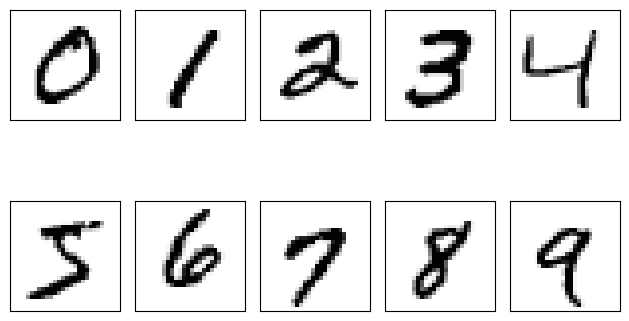

In [23]:
# X[0]

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    # Reshaping the 784-pixel vectors to original 28x28 image
    img = X[y == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show();

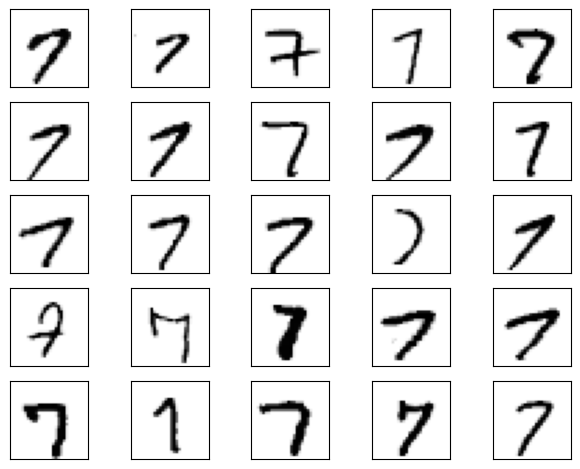

In [24]:
# Visualize 25 different versions of "7":

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X[y == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

Now, let’s divide the dataset into training, validation, and test subsets. The following code will split the dataset such that 55,000 images are used for training, 5,000 images for validation, and 10,000 images for testing:

In [25]:
from sklearn.model_selection import train_test_split


X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=10000, 
                                                  random_state=123, 
                                                  stratify=y)

X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, 
                                                      test_size=5000, 
                                                      random_state=123, 
                                                      stratify=y_temp)


# optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp, X, y

### Implementing a multi-layer perceptron(MLP)

In [27]:
# Helper functions to calculate logistic sigmoid activation and
# to convert integer class label arrays to one-hot encoded labels

import numpy as np

def sigmoid(z):
    return 1./(1. + np.exp(-z))

def int_to_onehot(y, num_labels):
    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1
    return ary

class NeuralNetMLP:
    """
    Implementing a MLP with only one hidden layer.
    """
    def __init__(self, num_features, num_hidden,
                 num_classes, random_seed=123):
        """
        The `__init__` constructor instantiates the weight matrices
        and bias vectors for the hidden and the output layer.
        """
        super().__init__()
        
        self.num_classes = num_classes
        
        # hidden
        rng = np.random.RandomState(random_seed)
        
        self.weight_h = rng.normal(loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)
        
        # output
        self.weight_out = rng.normal(loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)
    
    def forward(self, x):
        """
        The forward method takes in one or more training examples and 
        returns the predictions. In fact, it returns both the 
        activation values from the hidden layer and the output layer, 
        `a_h` and `a_out`. While `a_out` represents the 
        class-membership probabilities that we can convert to class labels, 
        which we care about, we also need the activation values from the 
        hidden layer, `a_h`, to optimize the model parameters; 
        that is, the weight and bias units of the hidden and output layers.
        """
        # Hidden Layer
        
        # input_dim:[n_examples, n_features] dot [n_hidden, n_features].T
        # output_dim:[n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)
        
        # Output layer
        
        # input_dim:[n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output_dim:[n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        
        return a_h, a_out

    
    def backward(self, x, a_h, a_out, y):
        """
        The backward method implements the so-called backpropagation 
        algorithm, which calculates the gradients of the loss with 
        respect to the weight and bias parameters.
        """
        ### Output layer weights
        
        # one-hot encoding
        y_onehot = int_to_onehot(y, self.num_classes)
        
        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use
        
        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2. * (a_out - y_onehot)/y.shape[0]
        
        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative
        
        # output_dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out
        
        # gradient for o/p weights
        
        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h
        
        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)
        
        #################################        
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight
        
        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out
        
        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)
        
        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative
        
        # [n_examples, n_features]
        d_z_h__d_w_h = x
        
        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out, 
                d_loss__d_w_h, d_loss__d_b_h)

In [28]:
model = NeuralNetMLP(num_features=28*28,
                     num_hidden=50,
                     num_classes=10)

The model accepts MNIST images reshaped into 784-dimensional vectors(in the format of X_train, X_valid, or X_test, which we defined previously) for the 10 integer classes (digits 0-9). The hidden layer consists of 50 nodes.
![](Images/neural_net_mlp.png)

### Coding the neural network training loop

In [30]:
import numpy as np

num_epochs = 50
minibatch_size = 100

def minibatch_generator(X, y, minibatch_size):
    """
    Takes in the dataset and divides it into mini-batches of
    desired size for SGD training.
    """
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1,
                           minibatch_size):
        batch_idx = indices[start_idx: start_idx + minibatch_size]
        
        yield X[batch_idx], y[batch_idx]
        
# Check if it works

# iterate over training epochs
for i in range(num_epochs):
    # iterate over minibatches
    minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
    
    for X_train_mini, y_train_mini in minibatch_gen:
        break
        
    break
    
print(X_train_mini.shape)
print(y_train_mini.shape)

(100, 784)
(100,)


In [32]:
# Now defining our loss function and performance metric

def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    
    return np.mean((onehot_targets - probas)**2)

def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels==targets)

# Let’s test the preceding function and compute the initial validation 
# set MSE and accuracy of the model we instantiated in the previous section:

_, probas = model.forward(X_valid)
mse = mse_loss(y_valid, probas)

predicted_labels = np.argmax(probas, axis=1)
acc = accuracy(y_valid, predicted_labels)

print(f'Initial validation MSE: {mse:.1f}')
print(f'Initial validation accuracy: {acc*100:.1f}%')

Initial validation MSE: 0.3
Initial validation accuracy: 9.4%


In this code example, note that `model.forward()` returns the hidden and output layer activations. Remember that we have 10 output nodes (one corresponding to each unique class label). Hence, when computing the MSE, we first converted the class labels into one-hot encoded class labels in the `mse_loss()` function. In practice, it does not make a difference whether we average over the row or the columns of the squared-difference matrix first, so we simply call `np.mean()` without any axis specification so that it returns a scalar. 


The output layer activations, since we used the logistic sigmoid function, are values in the range [0, 1]. For each input, the output layer produces 10 values in the range [0, 1], so we used the `np.argmax()` function to select the index position of the largest value, which yields the predicted class label. We then compared the true labels with the predicted class labels to compute the accuracy via the `accuracy()` function we defined. As we can see from the preceding output, the accuracy is not very high. However, given that we have a balanced dataset with 10 classes, a prediction accuracy of approximately 10 percent is what we would expect for an untrained model producing random predictions.

* **

Using the previous code, we can compute the performance on, for example, the whole training set if we provide `y_train` as input to targets and the predicted labels from feeding the model with `X_train`. However, in practice, our computer memory is usually a limiting factor for how much data the model can ingest in one forward pass (due to the large matrix multiplications). 


Hence, we are defining our MSE and accuracy computation based on our previous mini-batch generator. The following function will compute the MSE and accuracy incrementally by iterating over the dataset one mini-batch at a time to be more memory-efficient:

In [33]:
def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)
        
    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)
        
        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()
        
        num_examples += targets.shape[0]
        mse += loss

    mse = mse/i
    acc = correct_pred/num_examples
    return mse, acc

In [34]:
mse, acc = compute_mse_and_acc(model, X_valid, y_valid)
print(f'Initial valid MSE: {mse:.1f}')
print(f'Initial valid accuracy: {acc*100:.1f}%')

Initial valid MSE: 0.3
Initial valid accuracy: 9.4%


In [35]:
# Train our model

def train(model, X_train, y_train, X_valid, y_valid, 
          num_epochs, learning_rate=0.1):
    
    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []
    
    for e in range(num_epochs):
        # iterate over minibatches
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)
        
        for X_train_mini, y_train_mini in minibatch_gen:
            ### Compute Outputs ###
            a_h, a_out = model.forward(X_train_mini)
            ### Compute Gradients ###
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)
            
            ###Update weights###
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out
            
        #### Epoch Logging ####        
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

On a high level, the `train()` function iterates over multiple epochs, and in each epoch, it used the previously defined `minibatch_generator()` function to iterate over the whole training set in mini-batches for stochastic gradient descent training. Inside the mini-batch generator for loop, we obtain the outputs from the model, `a_h` and `a_out`, via its `.forward()` method. Then, we compute the loss gradients via the model’s `.backward()` method—the theory will be explained in a later section. Using the loss gradients, we update the weights by adding the negative gradient multiplied by the learning rate. This is the same concept that we discussed earlier for Adaline.
For example, to update the model weights of the hidden layer is defined as:
```
model.weight_h -= learning_rate * d_loss__d_w_h
```
For a single weight vector, $w_j$, this corresponds to the foll. partial derivative-based update: $$w_j := w_j - \eta \frac{\partial L}{\partial w_j}$$

Finally, the last portion of the previous code computes the losses and prediction accuracies on the training and test sets to track the training progress.

In [36]:
np.random.seed(123) # for the training set shuffling

epoch_loss, epoch_train_acc, epoch_valid_acc = \
    train(model, X_train, y_train, X_valid, y_valid,
          num_epochs=50, learning_rate=0.1)

Epoch: 001/050 | Train MSE: 0.05 | Train Acc: 76.15% | Valid Acc: 75.98%
Epoch: 002/050 | Train MSE: 0.03 | Train Acc: 85.45% | Valid Acc: 85.04%
Epoch: 003/050 | Train MSE: 0.02 | Train Acc: 87.82% | Valid Acc: 87.60%
Epoch: 004/050 | Train MSE: 0.02 | Train Acc: 89.36% | Valid Acc: 89.28%
Epoch: 005/050 | Train MSE: 0.02 | Train Acc: 90.21% | Valid Acc: 90.04%
Epoch: 006/050 | Train MSE: 0.02 | Train Acc: 90.67% | Valid Acc: 90.54%
Epoch: 007/050 | Train MSE: 0.02 | Train Acc: 91.12% | Valid Acc: 90.82%
Epoch: 008/050 | Train MSE: 0.02 | Train Acc: 91.43% | Valid Acc: 91.26%
Epoch: 009/050 | Train MSE: 0.01 | Train Acc: 91.84% | Valid Acc: 91.50%
Epoch: 010/050 | Train MSE: 0.01 | Train Acc: 92.04% | Valid Acc: 91.84%
Epoch: 011/050 | Train MSE: 0.01 | Train Acc: 92.30% | Valid Acc: 92.08%
Epoch: 012/050 | Train MSE: 0.01 | Train Acc: 92.51% | Valid Acc: 92.24%
Epoch: 013/050 | Train MSE: 0.01 | Train Acc: 92.65% | Valid Acc: 92.30%
Epoch: 014/050 | Train MSE: 0.01 | Train Acc: 92.80

The reason why we print all this output is that, in NN training, it is really useful to compare training and validation accuracy. This helps us judge whether the network model performs well, given the architecture and hyperparameters. For example, if we observe a low training and validation accuracy, there is likely an issue with the training dataset, or the hyperparameters’ settings are not ideal. 


**In general, training (deep) NNs is relatively expensive compared with the other models we’ve discussed so far. Thus, we want to stop it early in certain circumstances and start over with different hyperparameter settings. On the other hand, if we find that it increasingly tends to overfit the training data (noticeable by an increasing gap between training and validation dataset performance), we may want to stop the training early, as well.**

### Evaluating the neural network performance

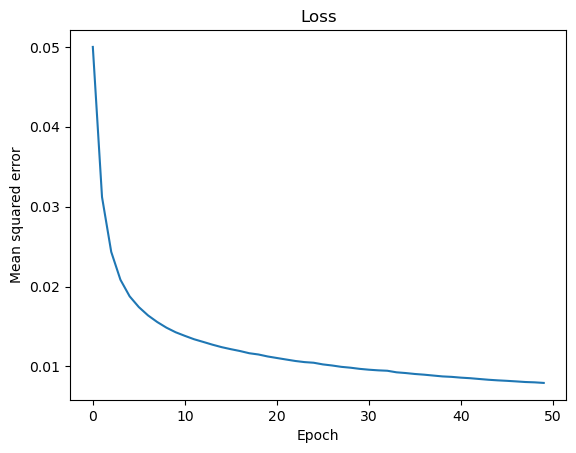

In [39]:
plt.plot(range(len(epoch_loss)), epoch_loss)
plt.ylabel('Mean squared error')
plt.xlabel('Epoch')
plt.title("Loss")
plt.show()

**As we can see, the loss decreased substantially during the first 10 epochs and seems to slowly converge in the last 10 epochs. However, the small slope between epoch 40 and epoch 50 indicates that the loss would further decrease with training over additional epochs.**

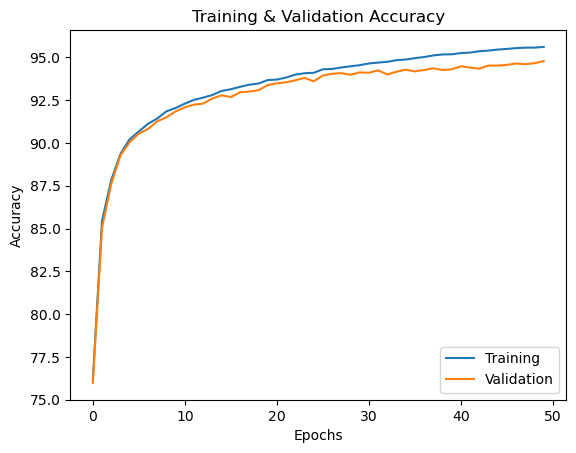

In [40]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.title("Training & Validation Accuracy")
plt.show()

**The plot reveals that the gap between training and validation accuracy increases as we train for more epochs. At approximately the 25th epoch, the training and validation accuracy values are almost equal, and then, the network starts to slightly overfit the training data.**

In [41]:
test_mse, test_acc = compute_mse_and_acc(model, X_test, y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 94.54%


**We can see that the test accuracy is very close to the validation set accuracy corresponding to the last epoch (94.74%), which we reported during the training in the last subsection. Moreover, the respective training accuracy is only minimally higher at 95.59%, reaffirming that our model only slightly overfits the training data.**

* **
**To further fine-tune the model, we could change the number of hidden units, the learning rate**, or use various other tricks that have been developed over the years but are beyond the scope of this book. In *Chapter 14, Classifying Images with Deep Convolutional Neural Networks*, you will learn about a different NN architecture that is known for its good performance on image datasets. 


Also, the chapter will introduce additional performance-enhancing tricks such as adaptive learning rates, more sophisticated SGD-based optimization algorithms, batch normalization, and dropout. 


Other common tricks that are beyond the scope of the following chapters include: 
- Adding skip-connections, which are the main contribution of residual NNs 

- Using learning rate schedulers that change the learning rate during training 

- Attaching loss functions to earlier layers in the networks as it’s being done in the popular Inception v3 architecture 

* **

Lastly, let’s take a look at some of the images that our MLP struggles with by extracting and plotting the first 25 misclassified samples from the test set:

In [42]:
X_test_subset = X_test[:1000, :]
y_test_subset = y_test[:1000]

_, probas = model.forward(X_test_subset)
test_pred = np.argmax(probas, axis=1)

misclassified_images = X_test_subset[y_test_subset != test_pred][:25]
misclassified_labels = test_pred[y_test_subset != test_pred][:25]
correct_labels = y_test_subset[y_test_subset != test_pred][:25]

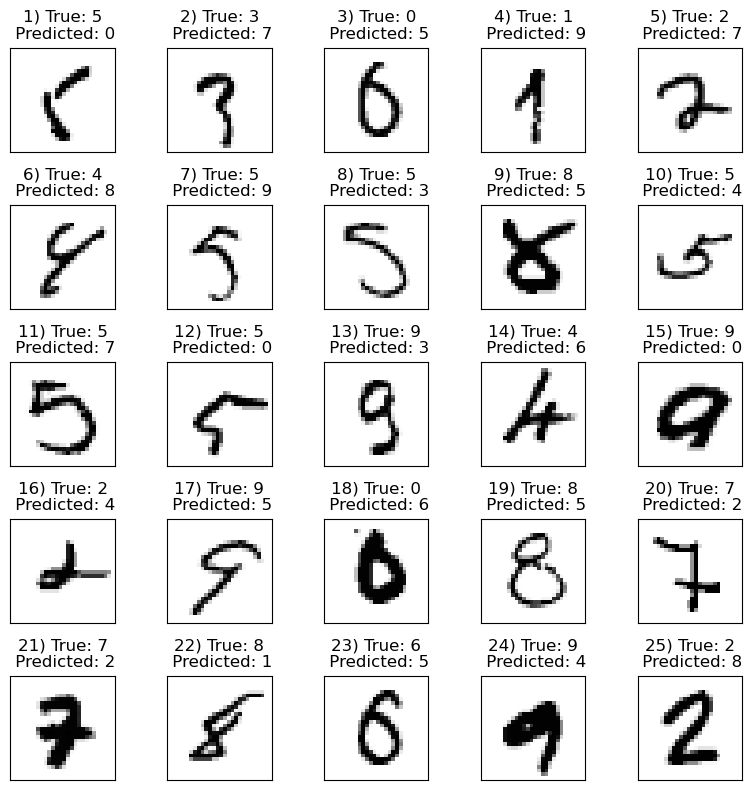

In [43]:
fig, ax = plt.subplots(nrows=5, ncols=5, 
                       sharex=True, sharey=True, figsize=(8, 8))
ax = ax.flatten()
for i in range(25):
    img = misclassified_images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(f'{i+1}) '
                    f'True: {correct_labels[i]}\n'
                    f' Predicted: {misclassified_labels[i]}')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
#plt.savefig('figures/11_09.png', dpi=300)
plt.show();

**As we can see in above, among others, the network finds 7s challenging when they include a horizontal line as in examples 19 and 20. Looking back at an earlier figure in this chapter where we plotted different training examples of the number 7, we can hypothesize that the handwritten digit 7 with a horizontal line is underrepresented in our dataset and is often misclassified.**

## 4.